In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/nebiyou/MPI_comparison_cali_262144/*0.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time", "Min time/rank", "Max time/rank", "Variance time/rank"], axis=1)#,"Avg time/rank", "Min time/rank", "Max time/rank", "Total time", "Avg GPU time/rank", "Min GPU time/rank", "Max GPU time/rank", "Total GPU time"
tk.dataframe

Avg time/rank  \
node                                               profile                     
{'name': 'main', 'type': 'function'}               80019754        10.337656   
                                                   90812372        20.766411   
                                                   214134720        0.970177   
                                                   345861487        0.350375   
                                                   495535379        0.483849   
                                                   662687249        4.226027   
                                                   702611652        0.198683   
                                                   810807701        6.521394   
                                                   936202668        5.175711   
                                                   1079792636       1.342674   
                                                   1126375019      22.071801   
                                                   1354898274       0.120166   
                                                   1370841147      46.381312   
                                                   1424312668       1.477310   
                                                   1557291929       1.644028   
                                                   1901423964      30.960376   
                                                   1978635996      41.090233   
                                                   2085068863       1.831510   
                                                   2147832208       2.498624   
                                                   2425901557       1.353781   
                                                   2664634372      11.224743   
                                                   2777507029       0.746160   
                                                   2920885439       2.495239   
                                                   2950363508       0.175822   
                                                   3033750422       1.345052   
                                                   3189530377      10.293606   
                                                   3208924406       1.330537   
                                                   3293718439       1.453414   
                                                   3454879658       0.372019   
                                                   3483734694       3.258783   
                                                   3483987342       0.520847   
                                                   3655230574       0.528572   
                                                   3732979628       1.329610   
                                                   4006054478       0.743748   
                                                   4068871536       1.727092   
                                                   4182272063       0.670753   
                                                   4204987820       0.484390   
{'name': 'comp', 'type': 'function'}               80019754         0.692098   
                                                   90812372              NaN   
                                                   214134720             NaN   
                                                   345861487             NaN   
                                                   495535379             NaN   
                                                   662687249             NaN   
                                                   702611652             NaN   
                                                   810807701        3.590515   
                                                   936202668             NaN   
                                                   1079792636            NaN   
                                                   1126375019      15.920356   
                                                   1354898274  

In [3]:
tk.metadata.columns

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'Algorithm', 'ProgrammingModel', 'Datatype', 'SizeOfDatatype',
       'InputSize', 'InputType', 'num_procs', 'group_num',
       'implementation_source'],
      dtype='object')

In [5]:
gb = tk.groupby("Algorithm")

4  thickets created...
{'Merge Sort': <thicket.thicket.Thicket object at 0x2b656d78e370>, 'Odd Even Transposition Sort': <thicket.thicket.Thicket object at 0x2b656d5abf70>, 'Radix Sort': <thicket.thicket.Thicket object at 0x2b656d70c1f0>, 'SampleSort': <thicket.thicket.Thicket object at 0x2b656d81ff40>}


In [6]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [7]:
ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

<ipython-input-7-9c519a2558e5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ctk.dataframe = ctk.dataframe.reset_index().drop(("node"), axis=1)


In [8]:
ctk.dataframe

Merge Sort Odd Even Transposition Sort  \
                              Avg time/rank               Avg time/rank   
name                num_procs                                             
main                2              0.528572                    0.520847   
                    4              0.970177                    0.372019   
                    8              0.484390                    0.483849   
                    16             0.743748                    0.746160   
                    32             1.353781                    1.345052   
                    64             1.831510                    1.342674   
                    128            1.453414                    1.477310   
                    256            1.644028                    1.727092   
                    512            4.226027                    2.495239   
                    1024          11.224743                    3.258783   
comp                2                   NaN                         NaN   
                    4                   NaN                         NaN   
                    8                   NaN                         NaN   
                    16                  NaN                         NaN   
                    32                  NaN                         NaN   
                    64                  NaN                         NaN   
                    128                 NaN                         NaN   
                    256                 NaN                         NaN   
                    512                 NaN                         NaN   
                    1024                NaN                         NaN   
comm                2                   NaN                         NaN   
                    4                   NaN                         NaN   
                    8                   NaN                         NaN   
                    16                  NaN                         NaN   
                    32                  NaN                         NaN   
                    64                  NaN                         NaN   
                    128                 NaN                         NaN   
                    256                 NaN                         NaN   
                    512                 NaN                         NaN   
                    1024                NaN                         NaN   
comm_large          2                   NaN                         NaN   
                    4                   NaN                         NaN   
                    8                   NaN                         NaN   
                    16                  NaN                         NaN   
                    32                  NaN                         NaN   
                    64                  NaN                         NaN   
                    128                 NaN                         NaN   
                    256                 NaN                         NaN   
                    512                 NaN                         NaN   
                    1024                NaN                         NaN   
Gatherv             2                   NaN                         NaN   
                    4                   NaN                         NaN   
                    8                   NaN                         NaN   
                    16                  NaN                         NaN   
                    32                  NaN                         NaN   
                    64                  NaN                         NaN   
                    128                 NaN                         NaN   
                    256                 NaN                         NaN   
                    512                 NaN                         NaN   
                    1024                NaN                         NaN   
comm_small          2                   NaN               

In [9]:
function_names = set(ctk.dataframe.index.get_level_values("name"))
num_threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
input_sizes = sorted(list(set(ctk.dataframe.columns.get_level_values(0))))

In [10]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
   # plt.xscale("log", base=2)
    plt.xticks(num_threads)
    plt.show()
    return fig, ax

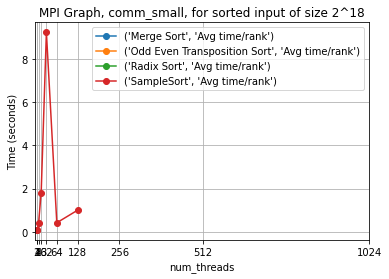

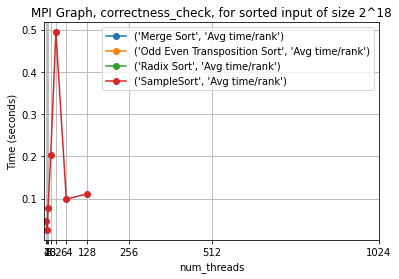

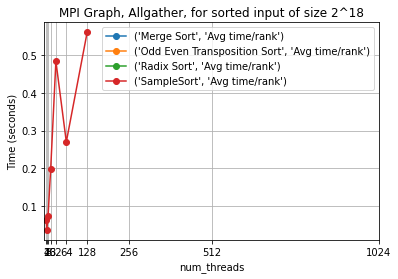

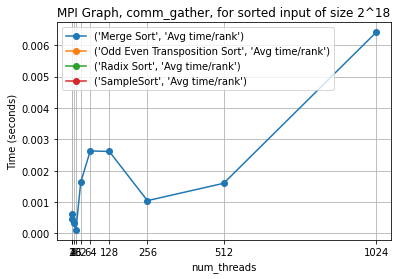

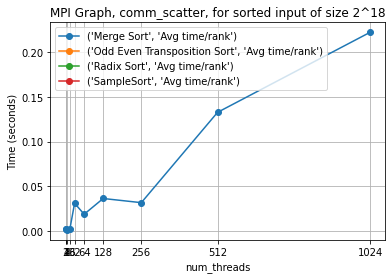

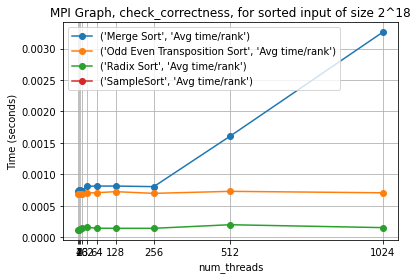

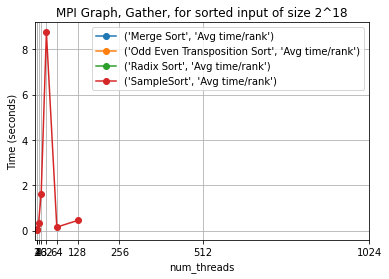

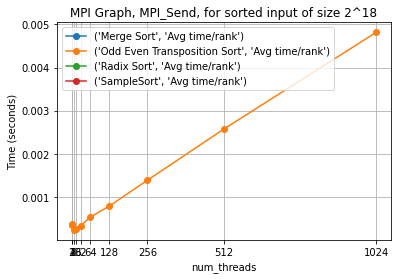

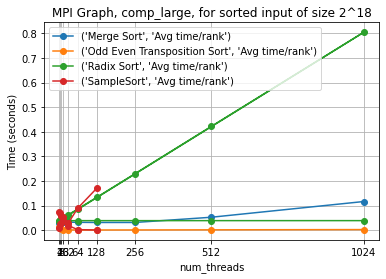

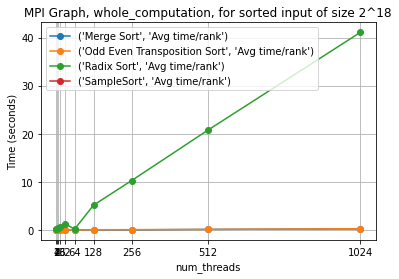

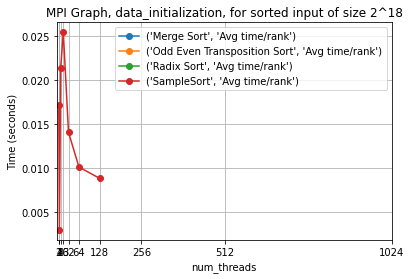

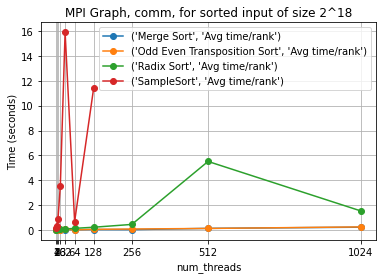

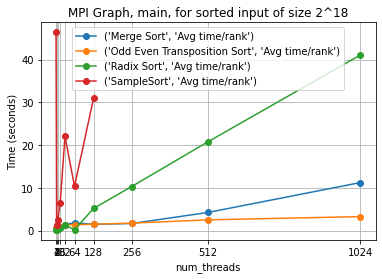

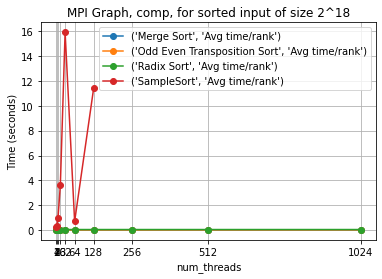

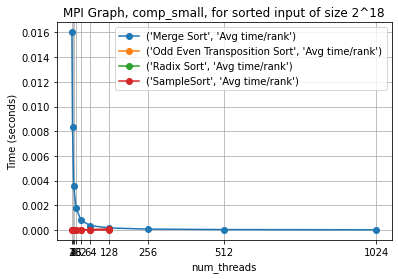

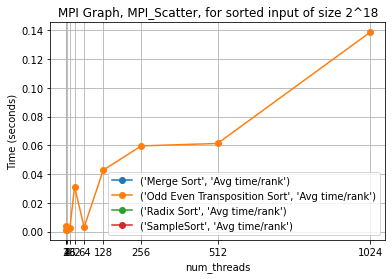

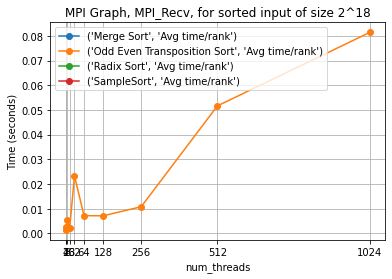

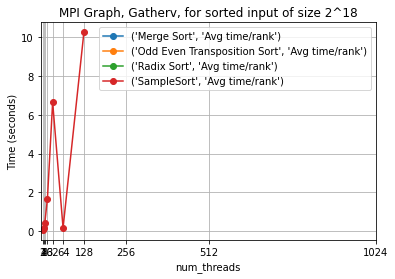

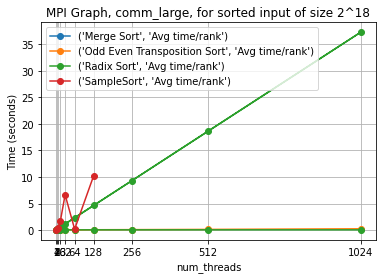

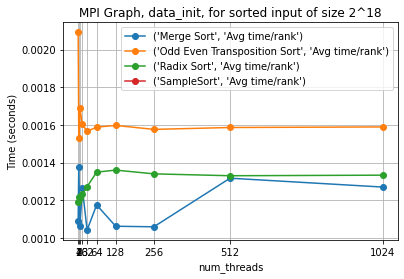

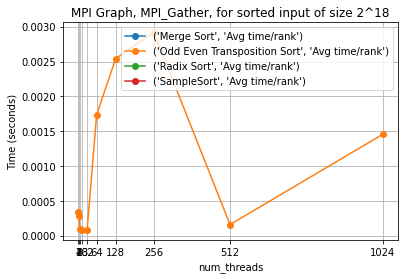

In [13]:
for name in function_names:
    # for size in input_sizes:
        plot_mpl(
            df=ctk.dataframe.loc[name],
            title=f"MPI Graph, {name}, for sorted input of size 2^18", 
            xlabel="num_threads",
            ylabel="Time (seconds)",
        )